In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 문제1. 의사결정트리 사용
## 유방암.csv 파일 열기

In [3]:
df = pd.read_csv(os.getcwd()+"/유방암.csv",engine='python',encoding='euc-kr')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 결측치 확인

In [29]:
df.isnull().count()

diagnosis                  569
mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
dtype: int64

## 종속변수와 설명변수 나누기

In [5]:
df_y = df["diagnosis"]
df_x = df.drop("diagnosis", axis=1,inplace = False)

## train, varidation, test 의 표본 0.4, 0.3, 0.3 으로 나누기

In [6]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3 ,random_state = 1234)
df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size = 0.428 ,random_state = 1234)

## 기본 의사결정트리에서의 3개의 표본데이터 설명력 확인

In [42]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 설명력 확인
print(tree_uncustomized.score(df_train_x, df_train_y))
#train 설명력 확인
print(tree_uncustomized.score(df_validation_x, df_validation_y))


1.0
0.935672514619883


## 최소 잎의 표본갯수를 선택하는 과정
### 최소 잎의 표본갯수 7을 선택

In [9]:
train_score = []; validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['validationScore'] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,1,1.000,0.936
1,2,0.996,0.936
2,3,0.991,0.924
3,4,0.982,0.918
4,5,0.978,0.930
5,6,0.974,0.936
6,7,0.974,0.936
7,8,0.969,0.930
8,9,0.969,0.930
9,10,0.969,0.930


## 그래프로 확인

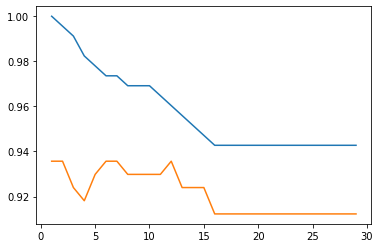

In [10]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, validation_score, linestyle = '-', label = "validation Score")

## 부모 노드에서 분리되는 노드의 최소 표본 갯수 선택
### split의 갯수에 상관없이 설명력이 같다. 그래서 leaf*2인 14를 선택

In [27]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(1,30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = 7, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['validationScore'] = validation_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,validationScore
0,2,0.974,0.936
1,4,0.974,0.936
2,6,0.974,0.936
3,8,0.974,0.936
4,10,0.974,0.936
5,12,0.974,0.936
6,14,0.974,0.936
7,16,0.974,0.936
8,18,0.974,0.936
9,20,0.974,0.936


### 그래프로 확인

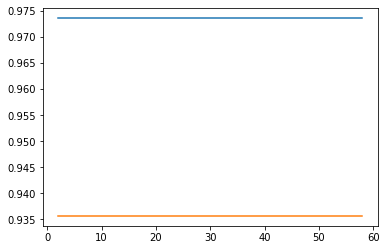

In [28]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, validation_score, linestyle = '-', label = "validation Score")

## 트리의 깊이 설정
### 깊이에 관계없이 Train과 validation score가 같은것을 볼 수 있다. 과대적합방지를 위해 4를 선택

In [22]:
train_score = []; validation_score = []
para_depth = [depth * 1 for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf = 7, min_samples_split=14,max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['validationScore'] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.943,0.912
1,2,0.974,0.936
2,3,0.974,0.936
3,4,0.974,0.936
4,5,0.974,0.936
5,6,0.974,0.936
6,7,0.974,0.936
7,8,0.974,0.936
8,9,0.974,0.936
9,10,0.974,0.936


## 깊이의 그래프 확인

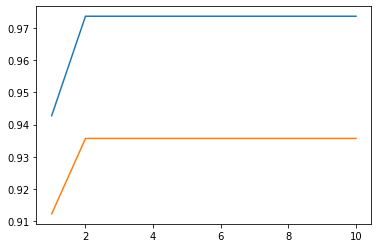

In [23]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, validation_score, linestyle = '-', label = "validation Score")

## 최종 의사결정 트리 생성

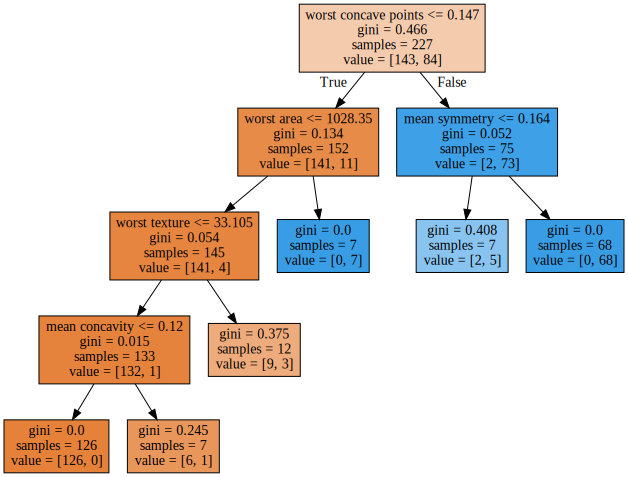

In [35]:
v_feature_name = df_train_x.columns
tree_final=DecisionTreeClassifier(random_state=1234, min_samples_leaf = 7, min_samples_split=14,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final, out_file='tree_final.dot', feature_names = v_feature_name,impurity=True,filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 변수 중요도 확인
### 중요 설명변수 : 최악의 오목한 점(Worst concave points), 최악의 지역(Worst area)
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

                    Feature  Importance
27     worst concave points       0.845
23               worst area       0.131
21            worst texture       0.013
22          worst perimeter       0.011
0               mean radius       0.000
1              mean texture       0.000
28           worst symmetry       0.000
26          worst concavity       0.000
25        worst compactness       0.000
24         worst smoothness       0.000
20             worst radius       0.000
19  fractal dimension error       0.000
18           symmetry error       0.000
17     concave points error       0.000
16          concavity error       0.000
15        compactness error       0.000
14         smoothness error       0.000
13               area error       0.000
12          perimeter error       0.000
11            texture error       0.000
10             radius error       0.000
9    mean fractal dimension       0.000
8             mean symmetry       0.000
7       mean concave points       0.000


Text(0, 0.5, 'Variable')

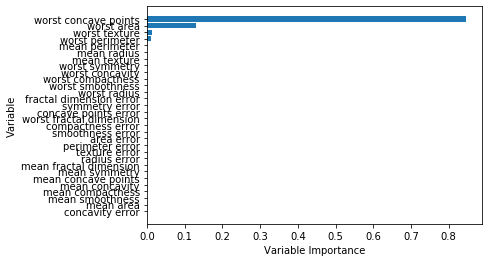

In [34]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
print(df_importance.round(3))


df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")



### Test 데이터셋의 정확도 및 분류율 확인

In [40]:
y_pred = tree_final.predict(df_test_x)
print('Test data set의 정확도: ',tree_final.score(df_test_x, df_test_y))
print(confusion_matrix(df_test_y,y_pred))

Test data set의 정확도:  0.9064327485380117
[[102   3]
 [ 13  53]]


# 문제2. 랜덤포레스트

In [41]:
from sklearn.ensemble import RandomForestClassifier

### 기본 랜덤포레스트로 가동한 train셋과 validation셋의 성능을 축력해 본다

In [44]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print(rf_uncustomized.score(df_train_x,df_train_y))
print(rf_uncustomized.score(df_validation_x,df_validation_y))

0.9955947136563876
0.9532163742690059


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 무작위성으로 생성되는 약한 학습기를 몇개를 생성할지 score점수를 확인하여 선택한다.
36개를 생성 했을때 가장 스코어점수가 높고 격차가 낮기때문에 36 선택

In [52]:
train_score=[]; varidation_score = []
para_n_tree = [n_tree*2 for n_tree in range(15,30)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['VaridationScore']= varidation_score
df_score_n.round(3)

,n_estimator,TrainScore,VaridationScore
0,30,1.0,0.953
1,32,1.0,0.953
2,34,1.0,0.953
3,36,1.0,0.959
4,38,1.0,0.959
5,40,1.0,0.953
6,42,1.0,0.953
7,44,1.0,0.953
8,46,1.0,0.953
9,48,1.0,0.953


## 그래프를 만들어 확인

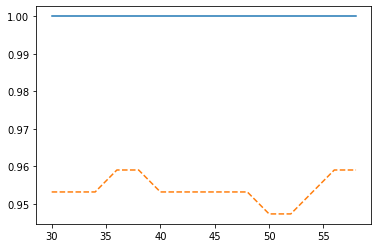

In [53]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, varidation_score, linestyle = '--', label = "varidation_score")

### 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 0으로 수렴해 가며 , 모델의 정확도는 36개에서 0.959로 가장 크기때문에 36개 선택

In [55]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator,oob_score=True,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1-rf.oob_score_)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not hav

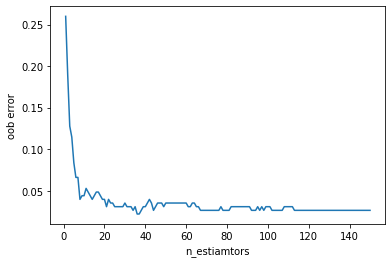

In [56]:
plt.plot(range(1,151),oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estiamtors')
n_estimators=100

## 최소 잎의 표본갯수를 선택하는 과정
### 최소 잎의 표본갯수가 16에서 VaridationScore가 가장 높은 score를 유지하고 있기때문에 16을 선택한다.

In [58]:
train_score=[]; varidation_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=36,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['VaridationScore']= varidation_score
df_score_leaf.round(3)

,leaf,TrainScore,VaridationScore
0,1,1.000,0.959
1,2,0.996,0.953
2,3,0.991,0.942
3,4,0.991,0.947
4,5,0.987,0.942
5,6,0.987,0.953
6,7,0.982,0.953
7,8,0.987,0.947
8,9,0.982,0.947
9,10,0.974,0.947


## 그래프를 만들어 확인한다.

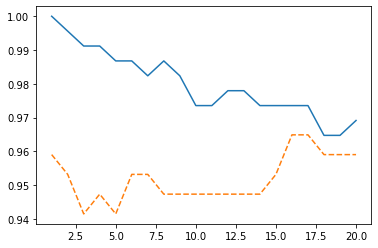

In [59]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, varidation_score, linestyle = '--', label = "varidation_score")

## 부모 노드에서 분리되는 노드의 최소 표본 갯수 선택
### split의 갯수에 상관없이 Train과 Varidation score가 같기때문에 32선택

In [61]:
train_score=[]; varidation_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(n_estimators=36,min_samples_leaf=16,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_split=pd.DataFrame()
df_score_split['split']= para_split
df_score_split['TrainScore']= train_score
df_score_split['VaridationScore']= varidation_score
df_score_split.round(3)

,split,TrainScore,VaridationScore
0,4,0.974,0.965
1,6,0.974,0.965
2,8,0.974,0.965
3,10,0.974,0.965
4,12,0.974,0.965
5,14,0.974,0.965
6,16,0.974,0.965
7,18,0.974,0.965
8,20,0.974,0.965
9,22,0.974,0.965


## 그래프로 확인

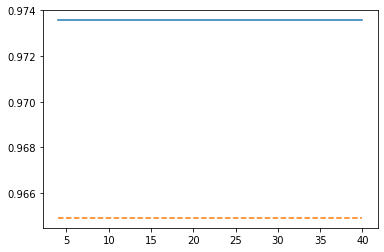

In [62]:
plt.plot(para_split, train_score, linestyle = '-', label = "train score")
plt.plot(para_split, varidation_score, linestyle = '--', label = "varidation_score")

## 트리의 깊이 설정
### 깊이가 3일때 Train과 Varidation Score가 가장 격차가 작은것을 확인 할 수 있다. 
### 그래서 깊이 3 선택

In [68]:
train_score=[]; varidation_score = []
para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(n_estimators=36,min_samples_leaf=16,min_samples_split=32, max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    varidation_score.append(rf.score(df_validation_x,df_validation_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['VaridationScore']= varidation_score
df_score_depth.round(3)



,depth,TrainScore,VaridationScore
0,1,0.943,0.942
1,2,0.969,0.965
2,3,0.974,0.965
3,4,0.974,0.965
4,5,0.974,0.965
5,6,0.974,0.965
6,7,0.974,0.965
7,8,0.974,0.965
8,9,0.974,0.965
9,10,0.974,0.965


### 그래프 확인

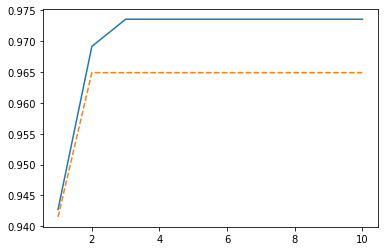

In [65]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, varidation_score, linestyle = '--', label = "varidation_score")

## 변수 중요도 확인
### 중요 설명변수 : 최악의 경계( worst perimeter), 최악의 반경(worst radius), 평균 요철(mean concavity)
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

                    Feature  Importance
22          worst perimeter       0.168
20             worst radius       0.152
6            mean concavity       0.139
27     worst concave points       0.123
23               worst area       0.069
7       mean concave points       0.061
2            mean perimeter       0.051
3                 mean area       0.048
0               mean radius       0.037
26          worst concavity       0.030
17     concave points error       0.025
13               area error       0.025
12          perimeter error       0.022
5          mean compactness       0.021
24         worst smoothness       0.011
25        worst compactness       0.004
28           worst symmetry       0.004
1              mean texture       0.002
29  worst fractal dimension       0.002
10             radius error       0.002
9    mean fractal dimension       0.001
16          concavity error       0.001
18           symmetry error       0.000
4           mean smoothness       0.000


Text(0, 0.5, 'Variable')

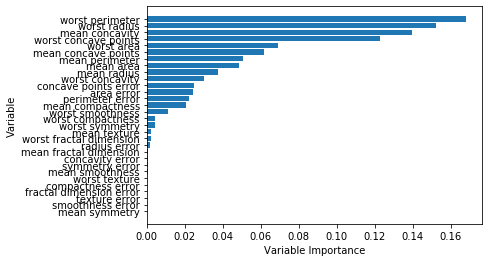

In [69]:

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
print(df_importance.round(3))

df_importance.sort_values("Importance", ascending =True , inplace= True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")


### Test 데이터셋의 정확도 및 분류율 확인

In [72]:
rf_final = RandomForestClassifier(n_estimators=36,min_samples_leaf=16,min_samples_split=32, max_depth=3, random_state = 1234)
rf_final.fit(df_train_x,df_train_y)

y_pred = rf_final.predict(df_test_x)
print('Test data set의 정확도: ',rf_final.score(df_test_x, df_test_y))
print(confusion_matrix(df_test_y,y_pred))

Test data set의 정확도:  0.9239766081871345
[[104   1]
 [ 12  54]]


# 결론
### 최종적으로 선택된 랜덤포레스트는 생성된 의사결정트리=36, 깊이 = 3, 분리노드최소수치 = 32, 최소잎의수치 =16 로하여 생성 되었고, 30%의 test 데이터로 성능을 확인해 본 결과 0.9239로 높은 수치의 정확도를 얻을 수 있었다.

### 의사결정트리를 이용했을때 보다 성능이 좋은 트리가 생성된것을 확인 할 수 있었다.